# **Project Name**    - USA Regional Sales Analysis

## **Project Summary**  


This EDA notebook dives info 2014–2018 USA sales dataset through:

Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

Univariate & Bivariate Analysis: Explored distributions, product/channel/region breakdowns, and customer segments.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

## **Problem Statement**  

Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

## **Objective**

Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit  
- Uncover seasonal trends and anomalies for optimized planning 
- Inform pricing, promotion, and market-expansion strategies  

These findings will guide to support strategic decision-making and sustainable growth.

# **Import Libraries**
***

#### Data Handling

In [1]:
import pandas as pd
import numpy as np

#### Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Warnings Handling

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**
***

In [5]:
# Path to Excel workbook
file_path = r"C:\Users\hemanth kumar\Desktop\jupyter projects\R\Data_Analysis_Sales\Regional Sales Dataset.xlsx"

# Read all sheets at once
sheets = pd.read_excel(file_path, sheet_name=None)

# Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

# Data preprocessing
***

#### **QUICK SHAPE OVERVIEW**

In [6]:
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


#### **QUICK VIEW OF ALL RAW DATAFRAMES**

In [7]:
# Print first few rows for each sheet

print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())



— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


#### Here df_state_reg column names was wrong
- The first row of df_state_reg contains the real column names.

In [7]:
# grab the first row
new_header = df_state_reg.iloc[0]

# set columns
df_state_reg.columns = new_header

# drop first row
df_state_reg.drop(index=[0],inplace=True)

# reset the indexs
df_state_reg.reset_index(drop=True,inplace=True)

- **Below Checking Dataset Columns** (to list all the column names present in the dataset).

- **Checking for Missing Values** (to identify missing(null) values in each column).

- **Checking for Duplicated Records** (to check if there are any duplicate row in the dataset).

In [8]:
df_sales.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost'],
      dtype='object')

In [9]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [10]:
df_sales.duplicated().sum()

np.int64(0)

In [11]:
df_customers.columns

Index(['Customer Index', 'Customer Names'], dtype='object')

In [12]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [13]:
df_customers.duplicated().sum()

np.int64(0)

In [14]:
df_products.columns

Index(['Index', 'Product Name'], dtype='object')

In [15]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [16]:
df_products.duplicated().sum()

np.int64(0)

In [17]:
df_regions.columns

Index(['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [18]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [19]:
df_regions.duplicated().sum()

np.int64(0)

In [20]:
df_state_reg.columns

Index(['State Code', 'State', 'Region'], dtype='object', name=0)

In [21]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [22]:
df_state_reg.duplicated().sum()

np.int64(0)

In [23]:
df_budgets.columns

Index(['Product Name', '2017 Budgets'], dtype='object')

In [24]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [25]:
df_budgets.duplicated().sum()

np.int64(0)

# **Data Cleaning**

### Merge all datasets into one dataset

In [26]:
# Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# Clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
# add any auto-generated cols you don't need

df = df.drop(columns=cols_to_drop)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


### Convert all column names to lowercase for consistency and easier access

In [27]:
df.columns = df.columns.str.lower()

# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

### Checking all columns unique values in the dataset

In [28]:
df['ordernumber'].nunique()

10684

In [29]:
df['orderdate'].nunique()

1520

In [30]:
df['customer name index'].unique()

array([126,  96,   8,  42,  73, 138,  53,  45,  85, 125,  13, 130, 148,
         4, 123,  64, 109,  83, 132,  19, 116,  22, 129,  95, 156, 143,
        88,  81, 114,  66,  78,  82, 161, 172,  72,  35,  92,  31, 111,
       117,  69,  84, 144,  33, 136,  36, 124, 121,  29, 168, 115, 113,
       105, 175, 139,  94, 146, 128, 159, 150,  12, 101, 133,  38,  24,
        56, 140,  93,  44,  43, 107, 166,  11,  37,  39,  57, 141, 152,
        58, 151, 155, 100,  60, 160,  15,  68, 165, 169,  98, 173,   9,
       112,  71,  25, 108, 174, 157, 120,  47,  50,  21,   7, 134,  17,
        80, 131,  52,  89,  67,  62, 135,   2,  41,  30,  51,  63, 154,
        28, 145,  77, 118, 163,  59,  90,  27,  55,  46,  26,  76,  20,
       142, 167,   6,  10,  54,  34, 119,  70,  48, 106,  74, 170, 149,
        16, 122,  99,  14,  79,  40,  75, 162, 147,   5,  32,  65,  49,
        87,  23,  86, 171,   1,   3, 103, 137, 158,  18, 127,  97, 153,
       104,  91, 110, 164,  61, 102])

In [31]:
df['channel'].unique()

array(['Wholesale', 'Distributor', 'Export'], dtype=object)

In [32]:
df['currency code'].unique()

array(['USD'], dtype=object)

In [33]:
df['warehouse code'].unique()

array(['AXW291', 'NXH382', 'GUT930', 'FLR025'], dtype=object)

In [34]:
df['delivery region index'].unique()

array([364, 488, 155, 473, 256, 626, 540, 156, 934, 652, 504, 389, 107,
       781, 458, 750, 594, 829,  19, 210,  74, 105, 331, 128,   1, 535,
       654, 542, 824,  82, 191, 676, 452, 356, 150, 701, 925, 528,  90,
       754, 400, 460, 490, 207, 329,  95, 587, 170, 923,  98, 442, 272,
       869, 747, 671,  31, 322, 787, 296, 235, 479, 254, 339,  45, 481,
       205, 861, 586, 752, 924, 330, 541,  81, 632, 408, 956, 115, 919,
       618, 346, 149, 478, 219, 989, 130,  29, 344, 545, 536, 405, 844,
       823, 670, 719, 992, 493, 411, 692, 179, 421, 811, 539, 426, 507,
       227, 617, 678, 883, 369, 301, 292, 223, 582, 362, 872, 476, 190,
       681, 744, 611, 779, 161, 804, 202, 952,  66,  62, 790, 378, 462,
       119, 173,  48, 712, 531, 559, 216, 466, 743, 749, 397, 899,  89,
       710,  16, 429, 274, 981, 799, 693, 416, 731, 276, 355, 432, 941,
       121, 643, 347, 104, 185,  78, 431, 955, 492, 969, 217, 394, 281,
       501, 139, 515, 961, 555, 905, 439, 690,  65, 753, 698, 49

In [35]:
df['product description index'].unique()

array([27, 20, 26,  7,  8, 23,  1, 25, 13, 14,  4, 15,  3, 10, 11,  5, 16,
       19,  2, 30, 18, 17, 21, 12, 28, 22,  6, 29, 24,  9])

In [36]:
df['order quantity'].unique()

array([ 6, 11,  7,  8, 10,  5, 12,  9])

In [37]:
df['unit price'].unique()

array([2499.1, 2351.7,  978.2, 2338.3, 2291.4, 5219.3, 2874.3, 1045.2,
       3852.5, 2914.5, 2257.9, 1232.8, 3859.2, 1983.2,  167.5,  924.6,
       1976.5, 6525.8, 1011.7, 2653.2, 3845.8, 1822.4, 5078.6,  844.2,
        268. , 5681.6, 3899.4,  174.2, 3644.8, 5875.9, 1085.4, 2237.8,
       1172.5, 2613. ,  938. , 2994.9, 1701.8, 1728.6, 1675. , 3872.6,
       1038.5, 3041.8, 5212.6, 3953. ,  850.9, 2519.2, 3108.8,  221.1,
       5929.5, 1065.3, 5708.4, 3839.1, 1098.8, 5688.3, 1246.2, 3825.7,
       3189.2, 2244.5, 6137.2, 2680. , 1092.1, 1688.4, 1802.3, 3946.3,
       3932.9, 1105.5, 1896.1, 2921.2, 2867.6,  911.2,  207.7, 2552.7,
       3973.1,  891.1, 1835.8, 3966.4,  214.4, 5152.3, 2418.7, 1125.6,
       6304.7, 2646.5, 2010. ,  247.9, 3906.1, 5386.8, 2559.4, 1809. ,
       1989.9, 2318.2, 5514.1,  944.7, 2472.3,  884.4, 3832.4, 1916.2,
       6371.7, 3356.7,  227.8, 1829.1, 2405.3, 1165.8, 3993.2, 1058.6,
       1078.7, 3999.9, 3879.3, 5406.9,  234.5, 2532.6, 2720.2, 2391.9,
      

In [38]:
df['unit price'].nunique()

664

In [39]:
df['line total'].nunique()

2535

In [40]:
df['total unit cost'].nunique()

5581

In [41]:
df['customer names'].unique()

array(['Rhynoodle Ltd', 'Thoughtmix Ltd', 'Amerisourc Corp',
       'Colgate-Pa Group', 'Deseret Group', 'Zoovu Corp', 'Kare Corp',
       'State Ltd', 'Lazzy Group', 'Zooveo Company', 'Nexus Group',
       'Jayo Company', 'Jabbercube Corp', 'Eire Corp', 'Muxo Group',
       'Fatz Group', 'WOCKHARDT Group', 'sanofi-ave Group',
       'CLINIQUE Ltd', 'Roberts Company', 'Epic Group', 'SAFEWAY Ltd',
       'Sanum-Kehl Group', 'Realbridge Corp', 'Actavis Company',
       'Mita Corp', 'Twitterbri Ltd', 'General Company', 'Terumo Corp',
       'Bluezoom Group', 'US Ltd', 'Accudial Company', 'Aveda Group',
       'BB17 Company', 'Wordware Company', 'Aromaticos Company',
       'Yodoo Ltd', 'Golden Corp', 'Buzzbean Group', 'ALK-Abello Ltd',
       'Vinte Group', 'The Ltd', 'Wordpedia Ltd', 'Cadila Ltd',
       'Bath Group', 'Trunyx Ltd', 'Roomm Company', 'Tambee Company',
       'Voolia Ltd', 'Podcat Corp', 'Dynazzy Company', 'Talane Group',
       'Oozz Group', 'SHISEIDO Ltd', 'Zoomzone Corp'

In [42]:
df['product name'].unique()

array(['Product 27', 'Product 20', 'Product 26', 'Product 7', 'Product 8',
       'Product 23', 'Product 1', 'Product 25', 'Product 13',
       'Product 14', 'Product 4', 'Product 15', 'Product 3', 'Product 10',
       'Product 11', 'Product 5', 'Product 16', 'Product 19', 'Product 2',
       'Product 30', 'Product 18', 'Product 17', 'Product 21',
       'Product 12', 'Product 28', 'Product 22', 'Product 6',
       'Product 29', 'Product 24', 'Product 9'], dtype=object)

In [43]:
df['product name'].nunique()

30

In [44]:
df['name'].unique()

array(['Savannah', 'Greenwood', 'Pleasanton', 'Bloomington', 'Manchester',
       'Minnetonka', 'Brookline', 'Pomona', 'South Jordan', 'Burlington',
       'Perry', 'Aurora', 'Indio', 'Dayton', 'St. Charles (Township)',
       'Islip', 'Lansing', 'Pittsburgh', 'Buckeye', 'Vallejo',
       'Diamond Bar', 'Huntington Beach', 'Poinciana', 'Mission Viejo',
       'Auburn', 'Metairie', 'Chapel Hill', 'Cambridge', 'Lancaster',
       'Encinitas', 'Santa Monica', 'Rockford', 'Augusta', 'Perris',
       'Parsippany-Troy Hills', 'Layton', 'Louisville', 'Fremont',
       'New Rochelle', 'Capital', 'Tinley Park', 'Harrison', 'Union City',
       'Pinellas Park', 'Gilroy', 'Detroit', 'Roseville', 'Waco',
       'Hacienda Heights', 'Orland Park', 'Waterbury (Town)',
       'College Station', 'Huntington', 'Grand Forks', 'Phoenix',
       'Palm Bay', 'Lorain', 'Fort Lauderdale', 'Greeley', 'Concord',
       'Hartford', 'Spring Hill', 'Arden-Arcade', 'Evansville', 'Turlock',
       'Atascocita', 'Dea

In [45]:
df['county'].unique()

array(['Chatham County', 'Johnson County', 'Alameda County',
       'Monroe County', 'Hartford County', 'Hennepin County',
       'Norfolk County', 'Los Angeles County', 'Salt Lake County',
       'Alamance County/Guilford County',
       'Kendall County/Kane County/Will County/DuPage County',
       'Riverside County', 'Montgomery County', 'Kane County',
       'Suffolk County', 'Clinton County/Ingham County/Eaton County',
       'Allegheny County', 'Maricopa County', 'Solano County',
       'Orange County', 'Polk County/Osceola County', 'Lee County',
       'Jefferson Parish', 'Durham County/Orange County',
       'Middlesex County', 'Lancaster County', 'San Diego County',
       'Hillsborough County', 'Winnebago County/Ogle County',
       'Richmond County', 'Morris County', 'Davis County',
       'Jefferson County', 'Westchester County', 'Sangamon County',
       'Cook County/Will County', 'Vigo County', 'Pinellas County',
       'Santa Clara County', 'Wayne County', 'Placer County

In [46]:
df['state_code'].unique()

array(['GA', 'IN', 'CA', 'CT', 'MN', 'MA', 'UT', 'NC', 'IL', 'OH', 'NY',
       'MI', 'PA', 'AZ', 'FL', 'AL', 'LA', 'NH', 'NJ', 'KY', 'TX', 'ND',
       'CO', 'MO', 'WA', 'WI', 'SD', 'NM', 'OR', 'IA', 'OK', 'VA', 'AR',
       'NE', 'TN', 'SC', 'DE', 'MD', 'KS', 'MT', 'ID', 'NV', 'RI', 'ME',
       'MS', 'DC', 'WY'], dtype=object)

In [47]:
df['state'].unique()

array(['Georgia', 'Indiana', 'California', 'Connecticut', 'Minnesota',
       'Massachusetts', 'Utah', 'North Carolina', 'Illinois', 'Ohio',
       'New York', 'Michigan', 'Pennsylvania', 'Arizona', 'Florida',
       'Alabama', 'Louisiana', 'New Hampshire', 'New Jersey', 'Kentucky',
       'Texas', 'North Dakota', 'Colorado', 'Missouri', 'Washington',
       'Wisconsin', 'South Dakota', 'New Mexico', 'Oregon', 'Iowa',
       'Oklahoma', 'Virginia', 'Arkansas', 'Nebraska', 'Tennessee',
       'South Carolina', 'Delaware', 'Maryland', 'Kansas', 'Montana',
       'Idaho', 'Nevada', 'Rhode Island', 'Maine', 'Mississippi',
       'District of Columbia', 'Wyoming'], dtype=object)

In [48]:
df['type'].unique()

array(['City', 'Town', 'Township', 'CDP', 'Consolidated Government',
       'Village', 'Borough', 'Charter Township',
       'Metropolitan Government', 'Unified Government', 'Urban County ',
       'Other'], dtype=object)

In [49]:
df['latitude'].unique()

array([32.08354, 39.61366, 37.66243, 39.16533, 41.77524, 44.9133 ,
       42.32385, 34.05529, 40.56217, 36.07613, 39.11904, 41.76346,
       33.72058, 39.75895, 41.94151, 40.71258, 42.71434, 40.44062,
       33.37032, 38.10409, 34.02862, 33.6603 , 28.11873, 33.60002,
       32.60986, 29.98409, 35.92812, 42.3751 , 40.03788, 33.03699,
       34.01945, 42.99564, 42.25884, 33.36149, 33.78252, 40.85964,
       41.06022, 38.25424, 37.54827, 40.91149, 39.79106, 41.56858,
       39.47555, 37.59583, 27.8428 , 37.00578, 42.33143, 38.75212,
       31.54933, 33.99307, 41.60815, 41.5585 , 30.62798, 40.88409,
       47.92526, 33.44838, 28.03446, 41.45282, 26.12231, 40.42331,
       41.65183, 41.76371, 28.47689, 38.60336, 37.97476, 37.49466,
       29.99883, 42.33698, 40.72833, 33.91371, 26.12759, 42.33176,
       34.06862, 39.01695, 42.03336, 47.30377, 33.85363, 31.09823,
       45.11997, 25.67149, 34.14778, 39.96548, 33.97918, 44.02471,
       34.00944, 33.42227, 25.75871, 42.30791, 29.95465, 41.84

In [50]:
df['latitude'].nunique()

989

In [51]:
df['longitude'].unique()

array([ -81.09983,  -86.10665, -121.87468,  -86.52639,  -72.52443,
        -93.50329,  -71.142  , -117.75228, -111.92966,  -79.4683 ,
        -86.51979,  -88.2901 , -116.21556,  -84.19161,  -88.321  ,
        -73.19552,  -84.55928,  -79.99589, -112.58378, -122.25664,
       -117.81034, -117.99923,  -81.47923, -117.672  ,  -85.48078,
        -90.15285,  -79.03742,  -71.10561,  -76.30551, -117.29198,
       -118.49119,  -71.45479,  -89.06455,  -82.075  , -117.22865,
        -74.42335, -111.97105,  -85.75941, -121.98857,  -73.78235,
        -89.64457,  -87.80422,  -87.38835, -122.01917,  -82.69954,
       -121.56828,  -83.04575, -121.28801,  -97.14667, -117.96868,
        -87.85929,  -73.03668,  -96.33441,  -73.37676,  -97.03285,
       -112.07404,  -80.58866,  -82.18237,  -80.14338, -104.70913,
        -85.94312,  -72.68509,  -82.52546, -121.38005,  -87.55585,
       -120.84659,  -95.1766 ,  -83.27326,  -73.99417,  -98.49339,
        -80.2331 ,  -71.12116, -118.02757,  -94.28161,  -87.88

In [52]:
df['longitude'].nunique()

989

In [53]:
df['area_code'].unique()

array([912, 317, 925, 812, 959, 952, 857, 909, 385, 336, 630, 760, 937,
       631, 517, 412, 623, 707, 657, 863, 949, 334, 504, 919, 717, 424,
       603, 815, 706, 951, 973, 502, 510, 914, 217, 708, 727, 408, 313,
       916, 254, 626, 203, 979, 701, 602, 321, 440, 954, 970, 574, 352,
       209, 832, 212, 940, 816, 847, 253, 562, 651, 305, 920, 323, 480,
       774, 605, 814, 505, 414, 848, 503, 303, 551, 512, 515, 269, 770,
       972, 765, 805, 856, 716, 616, 513, 530, 918, 804, 619, 330, 319,
       831, 318, 309, 432, 908, 501, 580, 678, 571, 213, 314, 757, 425,
       941, 219, 415, 260, 351, 405, 386, 509, 402, 559, 650, 417, 901,
       903, 347, 248, 563, 325, 586, 435, 956, 256, 845, 843, 302, 773,
       541, 301, 615, 712, 785, 406, 803, 315, 570, 208, 608, 445, 661,
       775, 614, 339, 410, 270, 360, 401, 262, 702, 704, 207, 516, 561,
       478, 810, 225, 734, 216, 407, 718, 520, 828, 518, 607, 610, 763,
       228, 682, 575, 202, 419, 612, 206, 913, 818, 772, 409, 81

In [54]:
df['population'].unique()

array([ 145674,   55586,   79510,   84067,   58007,   51669,   59195,
        153266,   66648,   52472,   53382,  200661,   87533,  140599,
         51812,  336113,  115056,  304391,   62138,  121253,   56897,
        201899,   56678,   97156,   62059,  140074,   59568,  110402,
         59339,   62930,   93220,  110229,  148278,  201793,   74971,
         53641,   74143,  760026,  232206,   79846,  116358,   57143,
         51268,   74494,   51617,   53231,  677116,  130269,  132356,
         55179,   58619,  108802,  107889,  204398,   57011, 1563025,
        107888,   63647,  178590,  100883,   55462,  124006,  100270,
         92844,  119943,   72292,   69470,   56145, 1644518,  104710,
         92560,   59016,  116732,   54148,   58677,   77006,   81611,
         72277,   62240,   54833,  142250,   92745,   87438,   66555,
         63921,  471825,   57123,   71209,  389617,   83886,  171544,
         99475,  118523,   84099,   60620,   68081,   88783,   56416,
       1026908,  147

In [55]:
df['population'].nunique()

971

In [56]:
df['households'].unique()

array([  52798,   20975,   26020,   30232,   24141,   22676,   25324,
         39378,   16748,   21562,   22213,   61449,   26144,   57316,
         18766,  101387,   48414,  132468,   15718,   41216,   17656,
         74460,   17275,   33483,   21767,   59557,   20335,   43801,
         21356,   23465,   46688,   45145,   58559,   73917,   16297,
         19745,   22209,       0,   72684,   28279,   50476,   21041,
         19760,   20461,   20981,   14989,  255740,   46547,   46719,
         16020,   22048,   40213,   36175,   69000,   23319,  525610,
         37821,   25218,   73446,   33774,   19401,   45239,   39038,
         40602,   51271,   23983,   21812,   20646,  738644,   37200,
         33208,   30752,   19132,   22191,   27280,   26083,   25204,
         24111,   15687,   54536,   32998,   27525,   26152,   19816,
        168914,   16085,   27028,  153140,   21721,   65538,   41131,
         49962,   35592,   27457,   28952,   27285,   20131,  314297,
         46895,   38

In [57]:
df['households'].nunique()

958

In [58]:
df['median_income'].unique()

array([ 36466,  54176, 124759,  30019,  63158,  78589,  95518,  49186,
        94183,  36140,  43799,  63090,  50525,  27683,  92472,  86864,
        35563,  40715,  58939,  57028,  89221,  83252,  39839, 100366,
        38342,  52421,  62208,  79416,  35313,  95149,  76580,  54282,
        38716,  39464,  49325,  89385,  69408,      0, 105355,  70036,
        49925,  74215,  30400,  85521,  41494,  83027,  25764,  75867,
        33147,  78039,  81453,  40467,  34186, 105451,  46149,  47326,
        43163,  35042,  50778,  48813,  38285,  30630,  41308,  45489,
        35785,  51401,  84982,  44620,  47030,  44543,  66647,  38085,
        63753,  65109,  59347,  79193,  47475,  64203,  58655,  72402,
       103718,  66457,  42650,  45875,  48809,  46449,  68219,  36792,
        41866,  52494,  34253,  46175,  50737,  45221,  38154,  76058,
        84871,  84647,  60976,  46956,  47557,  60827,  33567,  81898,
        63649,  54413,  63041,  41616,  46791,  40626,  56452,  36882,
      

In [59]:
df['median_income'].nunique()

956

In [60]:
df['land_area'].unique()

array([ 268318796,   72276415,   62489257,   60221613,   70972793,
         69730100,   17508399,   59446734,   57533764,   75533002,
         91577113,  116273603,   86057044,  144197693,   90236917,
        268844871,  101329851,  143423857, 1015960556,   79438815,
         38539601,   69762694,  186162684,   45837210,  152375113,
         60144259,   54861359,   16556713,   18718450,   48722319,
         21795228,   85627013,  164382960,  840008393,   81742547,
         60892028,   57235335,  159116437,  200632984,   26807094,
        154319522,   41743331,   59675554,   50244982,   41127042,
         41808104,  359360867,  111337848,  230561142,   28957966,
         56938629,   73880017,  132070745,  243808665,   69852722,
       1340692038,  170217927,   61313519,   89672308,  123893579,
         92971376,   45016120,  154983928,   46185637,  122628548,
         43830795,   62552086,   30402482,   59100000,  187027492,
         56037359,   24766390,   57890712,   37150630,   76842

In [61]:
df['land_area'].nunique()

969

In [62]:
df['water_area'].unique()

array([ 13908113,      1883,    386195,    475857,    720300,   5587760,
          184972,     26188,    228038,   3947235,    280736,   2278285,
           20661,   2208312,   1907075, 153259682,   1640233,   7692318,
          343920,  48871171,     13084,  13438927,   2719596,    968033,
         2646161,    109317,    393225,   1861901,    330105,   3050086,
            3025,   4850146,   2627885,  11042219,    284236,   4762327,
          444235,  12579358,  26291597,   7472696,  16272442,     30829,
         1285182,         0,   1726564,     26658,  10667144,      3366,
        31850141,     18431,    736535,   1086045,    369349, 111325968,
          488150,   3247104,   8124203,   1228516,   4372775,    314890,
         1798524,   1748078,   6194314,    232743,   1274315,     69528,
          449664,     22745,  28000000,     61486,    773422,    221652,
          199618,    379921,    555761,    133056,  12464194,   1914190,
          571867,    377058,   2813315,     40476, 

In [63]:
df['water_area'].nunique()

915

In [64]:
df['time_zone'].unique()

array(['America/New York', 'America/Indiana/Indianapolis',
       'America/Los Angeles', 'America/Chicago', 'America/Denver',
       'America/Detroit', 'America/Phoenix',
       'America/Kentucky/Louisville', 'America/Boise'], dtype=object)

In [65]:
df['region'].unique()

array(['South', 'Midwest', 'West', 'Northeast'], dtype=object)

In [66]:
df['2017 budgets'].unique()

array([ 964940.231, 2067108.12 , 5685138.27 ,  889737.555, 1085037.329,
       1135815.758, 3016489.209, 5342315.484, 3720639.645, 4028698.409,
       2885560.824, 3299478.315, 2642352.432,  864331.624, 1230458.484,
       3925424.542, 2062061.144, 1645841.6  , 3050087.565, 1011609.684,
       2309499.045, 2119616.824,  959899.218, 1356976.996, 1003867.767,
        663601.902, 1672229.416,  594471.57 ,  756557.97 ,  710415.405])

In [67]:
# Display the columns for filtering
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

#### *DROP UNNECESSARY COLUMNS*

In [68]:
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'type',               # type of region
    'region',             # broader U.S. region (e.g., South, West)
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

#### *Rename to more Pythonic / self-explanatory names, including region*

In [69]:
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'type'             : 'type',           # type of region
    'region'           : 'us_region',      # broader U.S. region
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,type,us_region,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,City,South,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,City,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,City,West,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,City,Midwest,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Town,Northeast,1085037.329


In [70]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

In [73]:
# Check for missing values in each column of the dataset
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
type                 0
us_region            0
budget           48841
dtype: int64

- Here budget has null values because, we having 2017 budget only

# *Feature Engineering*

In [74]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,type,us_region,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,City,South,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,City,Midwest,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,City,West,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,City,Midwest,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Town,Northeast,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,CDP,Northeast,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Village,Midwest,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,City,South,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Town,Northeast,NaN,20511.246,7206.654,26.0,February,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       64104 non-null  object        
 1   order_date         64104 non-null  datetime64[ns]
 2   customer_name      64104 non-null  object        
 3   channel            64104 non-null  object        
 4   product_name       64104 non-null  object        
 5   quantity           64104 non-null  int64         
 6   unit_price         64104 non-null  float64       
 7   revenue            64104 non-null  float64       
 8   cost               64104 non-null  float64       
 9   state              64104 non-null  object        
 10  state_name         64104 non-null  object        
 11  type               64104 non-null  object        
 12  us_region          64104 non-null  object        
 13  budget             15263 non-null  float64       
 14  total_

## Dataset information

- **64,104 rows** with **19 columns**

- The columns has **no missing values**, except **budget**.

- **Mixed data types:** **categorical** (object), **numerical** (int/float), **date-time.**

# **Analysis**
****

## *Identifying Top-Selling and Low-Selling Products*

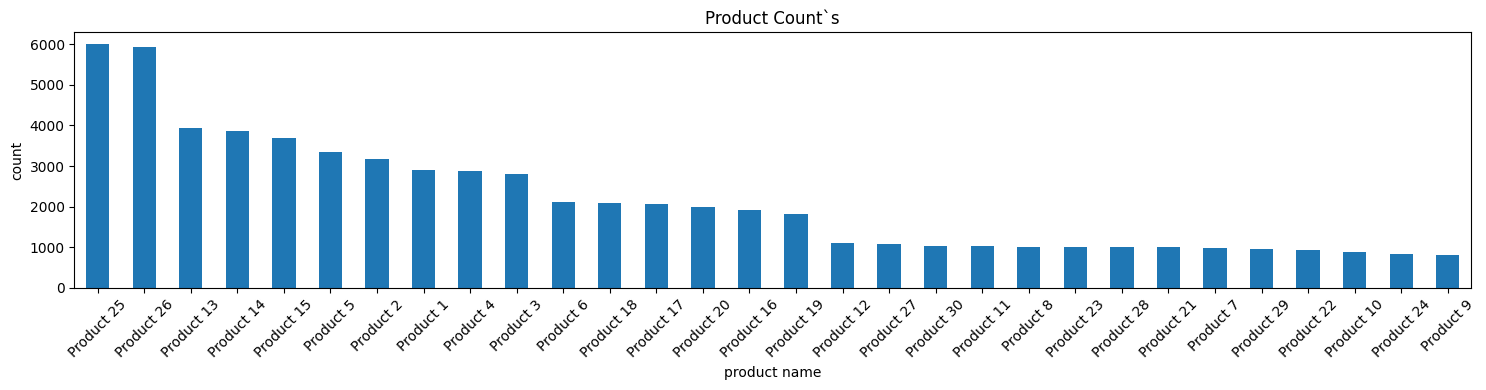

In [104]:
plt.figure(figsize=(15,4))
df['product_name'].value_counts().plot(kind='bar')

plt.title('Product Count`s')
plt.ylabel('count')
plt.xlabel('product name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Product 25** and **product 26** dominate the sales count, each with nearly **6000 units sold**, These two products together contribute a major portion of total sales.

- Focus marketing, inventory, and supply chain efforts on **high-demand products(25,26)**.

- For low-selling products, consider **promotions, discounts, or phasing out** if they are not profitable.

## *Distribution of Sales Across Location Types*

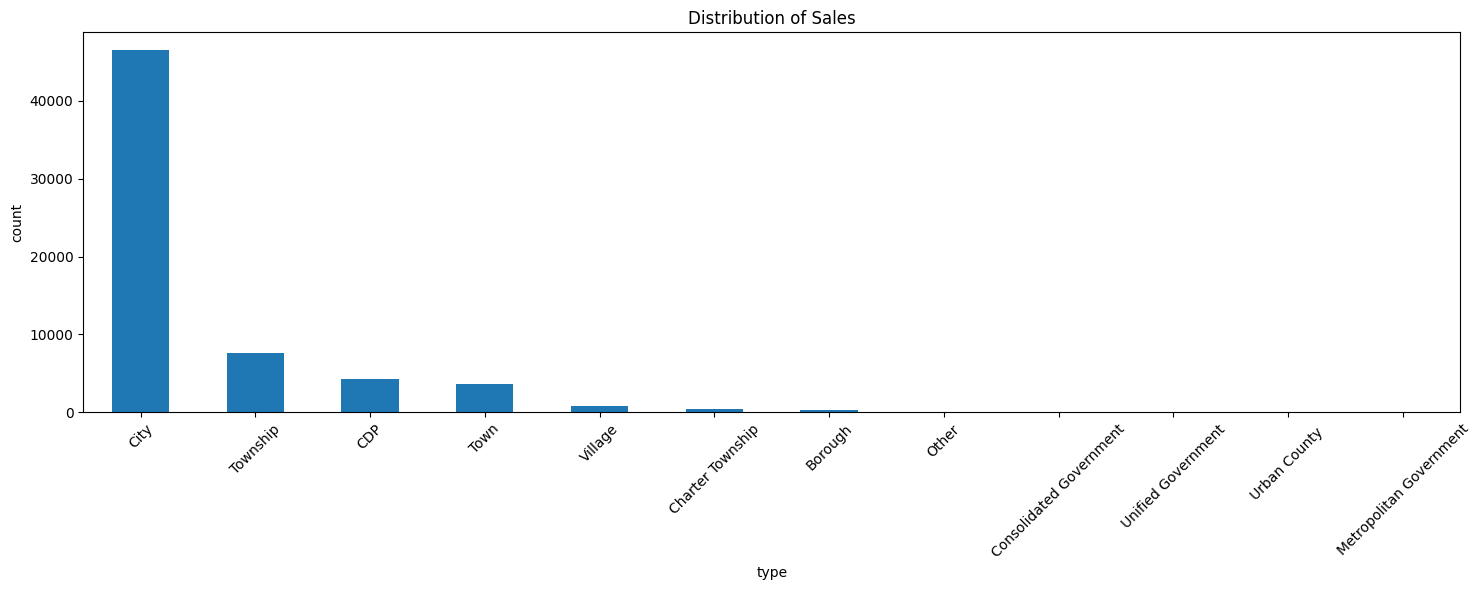

In [106]:
plt.figure(figsize=(15,6))
df['type'].value_counts().plot(kind='bar')

plt.title('Distribution of Sales')
plt.ylabel('count')
plt.xlabel('type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This means the bulk of sales are concentrated in **urban city areas**(near to 45,000).

- **Township and CDP** follow next with moderate counts(mid-level contribution compare to cities)

- **Towns, Villages, Charter Townships, Boroughs** show relatively low sales(below 5,000).

## *Average Profit Margin by Channel*

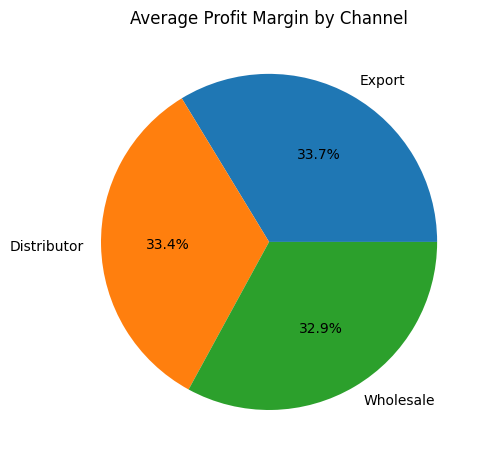

In [109]:
apm_sales = df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))
plt.pie(apm_sales.values,labels=apm_sales.index,autopct='%1.1f%%')

plt.title('Average Profit Margin by Channel')
plt.tight_layout()
plt.show()

- Export channel holds the **highest average profit margin (33.7%)**,just a little above the others.

- All three channels are **almost equally profitable** (difference less than 1%).This indicates the business is not overly dependent on one single channel.

- A **slight focus on exports** could maximize overall profitability.

## *Revenue Contribution Among U.S.States*

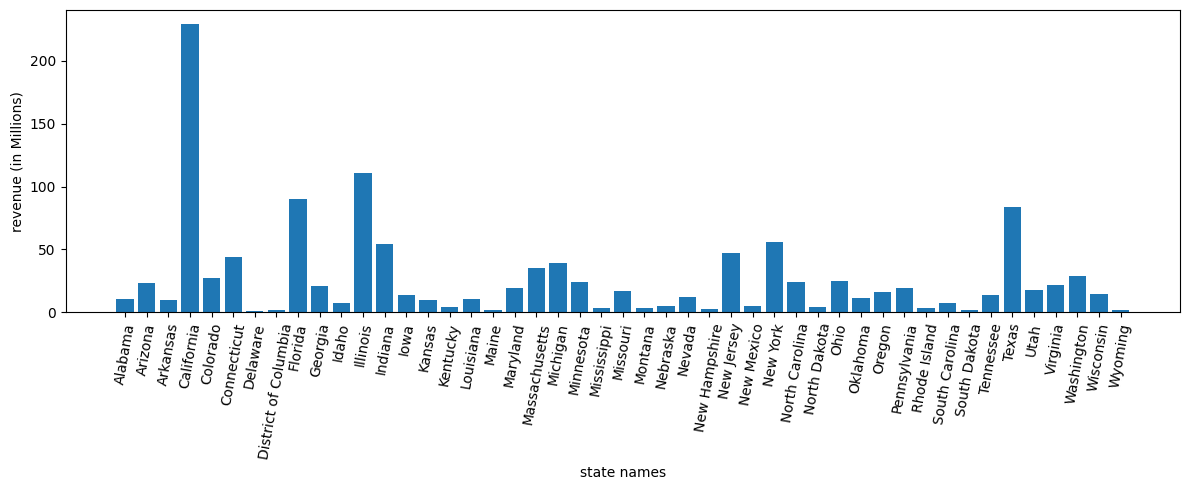

In [143]:
st_revenue = df.groupby('state_name')['revenue'].sum()

plt.figure(figsize=(12,5))
plt.bar(st_revenue.index,st_revenue.values *(10**-6))

plt.xlabel('state names')
plt.ylabel('revenue (in Millions)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

- California generates **over 220 million** in revenue, far higher than any other state.It contributes the largest share to overall revenue, making it a **primary business hub**

- **Florida, Illinois, Texas, New York, and New Jersey** also show **strong revenue contributions(50-110  milllion range)**, these are the **secondary drivers of revenue** after california.

- **Maximize efforts in california**(top-performing state).

- For low-revenue state, evaluate whether to **scale down investments** or **explore new marketing stratefies.**

## *Monthly Sales Trend Over Time*

- Track revenue trends over time to detect seasonality or sales spikes

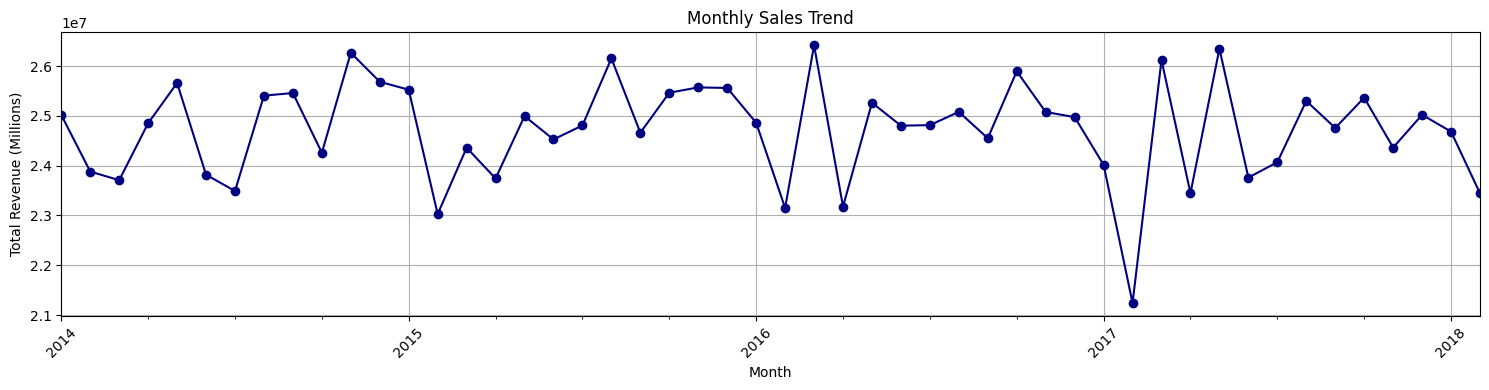

In [75]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.grid()
plt.show()

- Sales consistently cycle between **24 M  and 26 M ($)**, with clear peaks to early summer (May–June) and troughs each January.  

- However, **the revenue drop in early 2017** stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

## *Monthly Sales Trend (All Years Combined)*

- Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

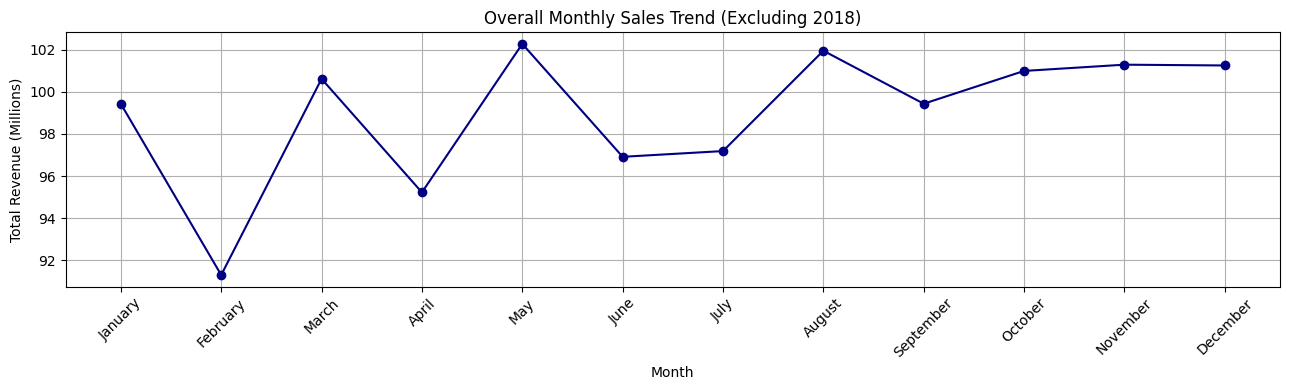

In [76]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   
# exclude any partial-year data (January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.

# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (df_.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().sort_index())

# 3. Plot setup
plt.figure(figsize=(13, 4))
plt.plot(monthly_sales.index.get_level_values(1), (monthly_sales.values * (10**-6)), marker='o', color='navy')

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


- Across all years, January begins strong with roughly 99 M, followed by a steep decline through April’s low point (95 M).

- Sales rebound in **May and August (102 M)**.

- Sales rebound again from **September to December (99M – 101M)**.

## *Top 10 Products by Revenue (in Millions)*

- Identify the highest-grossing products to focus marketing and inventory efforts

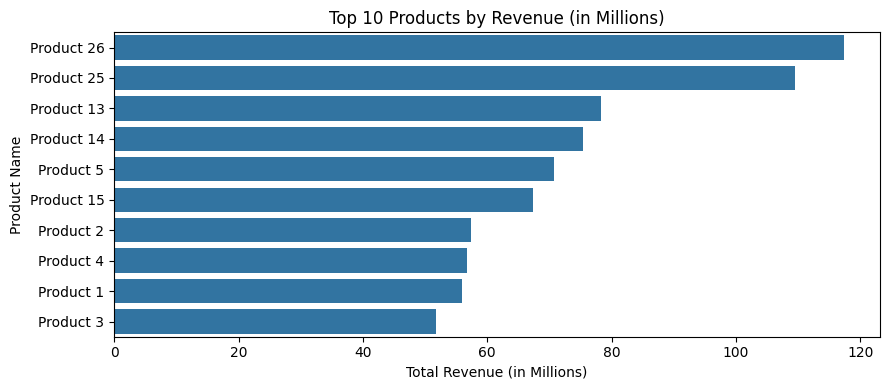

In [77]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1000000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))
sns.barplot(x=top_prod.values,y=top_prod.index)
plt.title('Top 10 Products by Revenue (in Millions)') 
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

- **Products 26 and 25** pull away at **118 M and 110 M**.

- sharp **drop near to 80M for Product 13**, product 14 and 5 and 15 are mid-pack at 70M – 80M. 

- The bottom four cluster at 50M – 60M, highlighting similar constraints.

## *Top 10 Products by Avg Profit Margin*

- Compare average profitability across products to identify high-margin items

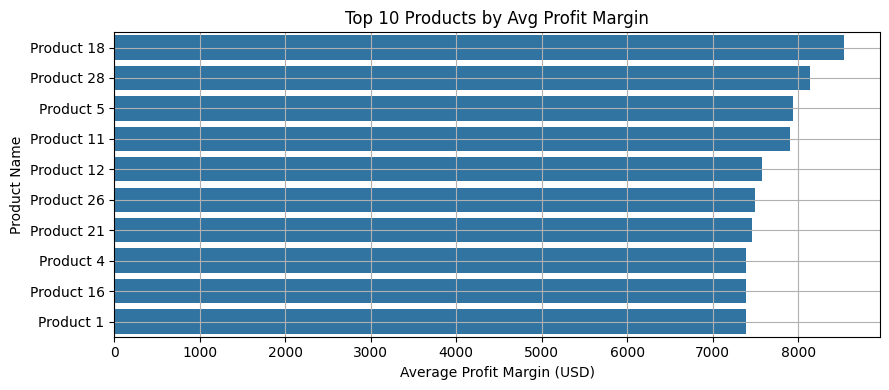

In [78]:
# Compute average profit per product and take the top 10
top_margin = (df.groupby('product_name')['profit'].mean().sort_values(ascending=False).head(10))

# Set the figure size for clarity
plt.figure(figsize=(9, 4))
sns.barplot(x=top_margin.values, y=top_margin.index)

plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.grid()
plt.show()

- **Products 18 and 28 lead with average profit margins** of approximately above 8K, followed closely by Product 5 and Product 11 around near to 7.9–8.0 K.

- Products 12, 26, 21, 4, 16, 1 falls between 7.4-7.8 (these all are close to each-other).

- Focusing on margin optimization strategies from top performers may help to increases overall product profitability.

## *Sales by Channel (Pie Chart)*

- Show distribution of total sales across channels to identify dominant sales routes

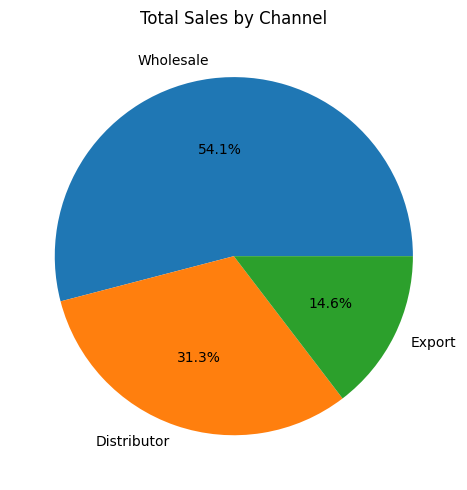

In [79]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))
plt.pie(chan_sales.values,labels=chan_sales.index,autopct='%1.1f%%')

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

- Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %.

## *Average Order Value (AOV) Distribution*

- Understand distribution of order values to identify typical spending levels and outliers

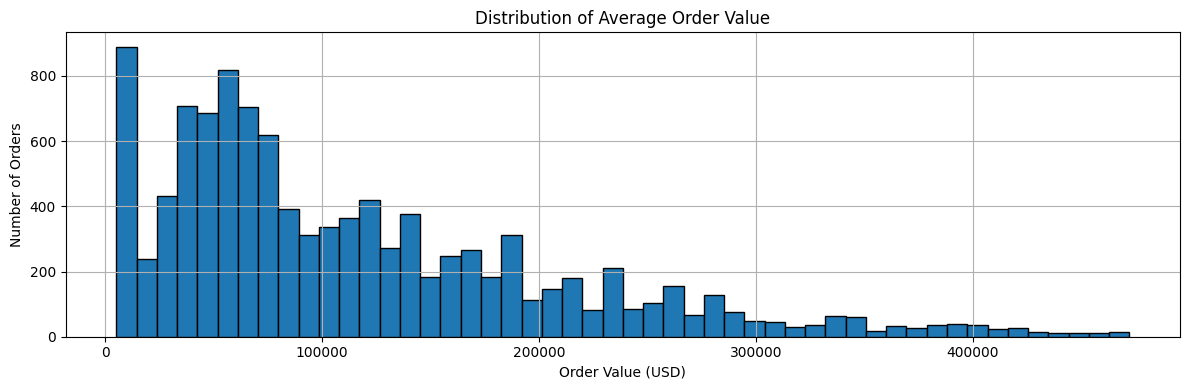

In [80]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))
plt.hist(aov,bins=50,edgecolor='black')

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.grid()
plt.show()

- The order‐value distribution is heavily right‐skewed, with most orders are less than 150K. 

- A long tail of high-value transactions extends up toward 400K – 500K, but these large orders represent only a small share of total volume.

## *Total Sales by US Region*

- Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

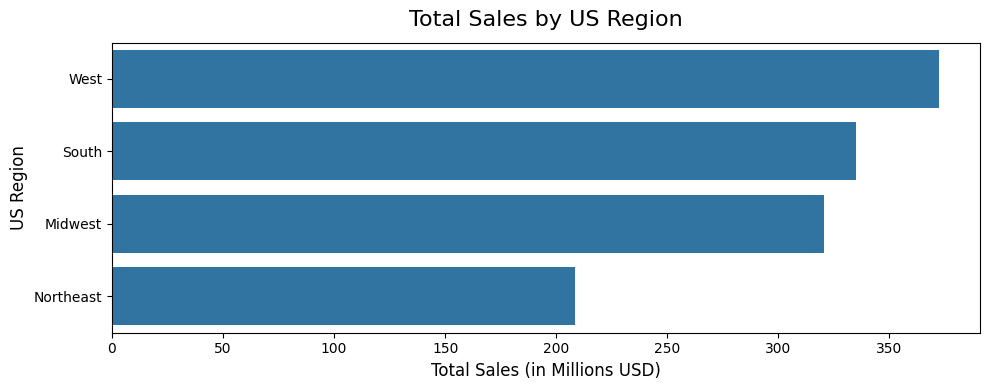

In [81]:
# 1. Aggregate total sales by region (in millions)
region_sales = (df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)/(10**6))

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=region_sales.values,y=region_sales.index)

plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


- **West dominates** with roughly 360M in sales, underscoring its market leadership.  
- **South & Midwest** each contribute over 320M, indicating strong, consistent demand across central regions.  
- **Northeast trails** at about near to 210M,growth and targeted investment.
- **Action:** Focus on closing the Northeast gap with local promotions and strategic partnerships.

## *Top and Bottom 10 Customers by Revenue*

- Identify your highest and lowest revenue customers to tailor engagement strategies

- Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

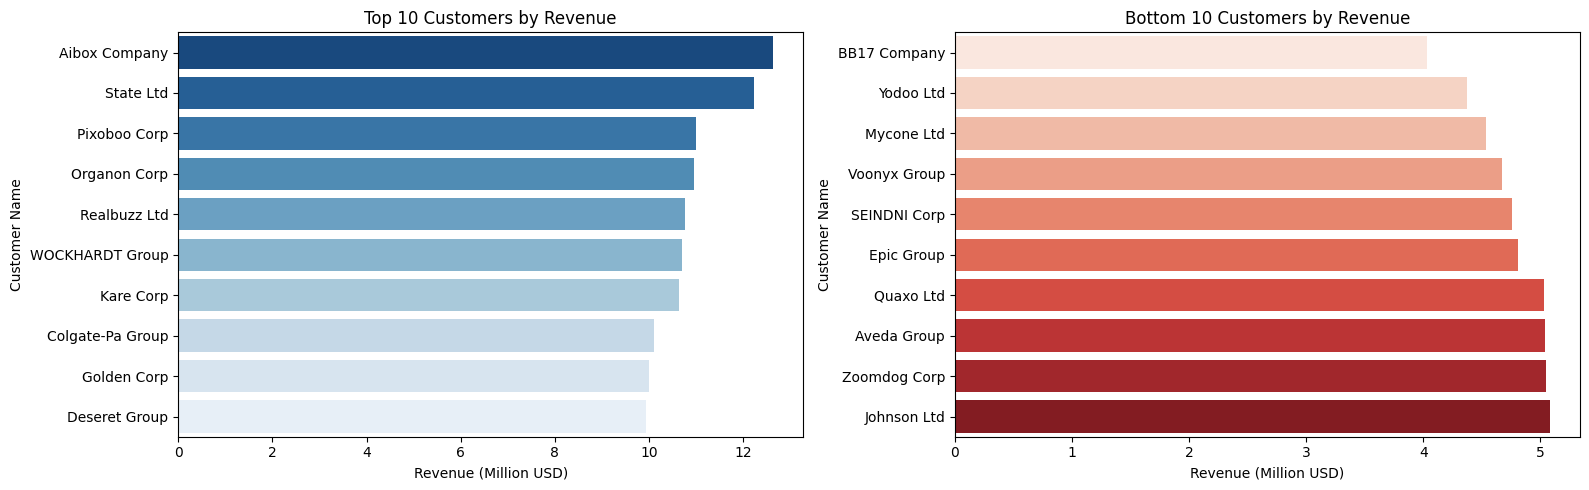

In [82]:
# Calculate total revenue per customer and select top 10
top_rev = (df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).head(10))

# Calculate total revenue per customer and select bottom 10
bottom_rev = (df.groupby('customer_name')['revenue'].sum().sort_values(ascending=True).head(10))

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(x=top_rev.values / (10**6), y=top_rev.index, palette='Blues_r', ax=axes[0])

axes[0].set_title('Top 10 Customers by Revenue')
axes[0].set_xlabel('Revenue (Million USD)')
axes[0].set_ylabel('Customer Name')

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(x=bottom_rev.values / (10**6), y=bottom_rev.index, palette='Reds', ax=axes[1])

axes[1].set_title('Bottom 10 Customers by Revenue')
axes[1].set_xlabel('Revenue (Million USD)')
axes[1].set_ylabel('Customer Name')


plt.tight_layout()
plt.show()

- **Aibox Company** tops the list with 12.5M, followed closely by **State Ltd** with above 12.1M.

- At the bottom, **Johnson Ltd** leads its group with 5.1M, down to **BB17 Company** at 4.1M—roughly half the top customer’s revenue.

- This steep drop from 10M+ to 4–5M highlights high revenue concentration among the top customers.

## *Top 10 States by Revenue and Order Count*

- Identify highest revenue-generating states and compare their order volumes

- First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

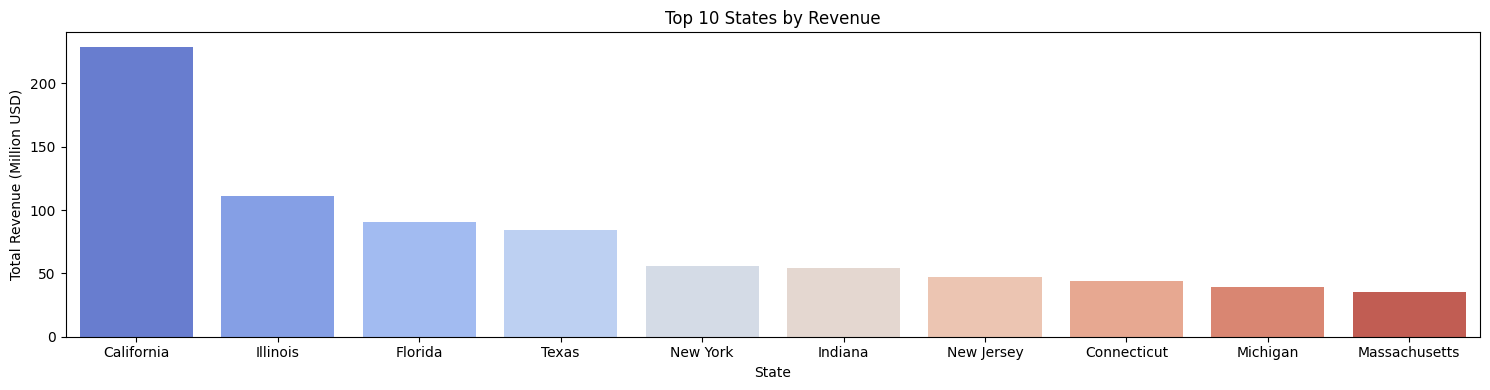

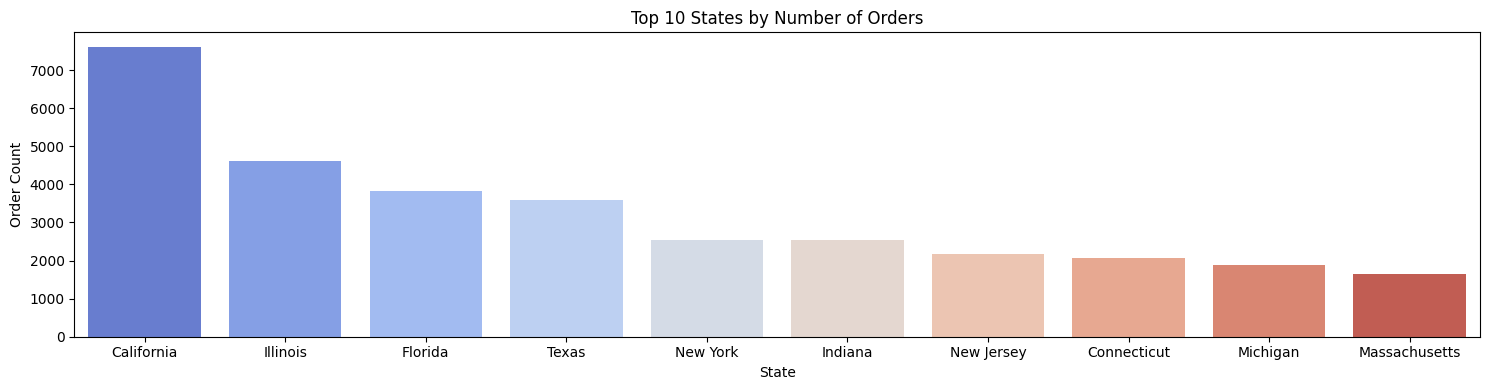

In [84]:
# Aggregate total revenue and unique order count per state
state_rev=df.groupby('state_name').agg(revenue=('revenue', 'sum'),orders=('order_number', 'nunique')).sort_values('revenue', ascending=False).head(10)

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(x=state_rev.index, y=state_rev['revenue'] / (10**6), palette='coolwarm')

plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(x=state_rev.index, y=state_rev['orders'], palette='coolwarm')

plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

## *Correlation Heatmap of Numeric Features*

- Identify relationships among key numeric variables to uncover potential multicollinearity

- Annotated heatmap with correlation coefficients for selected numeric columns

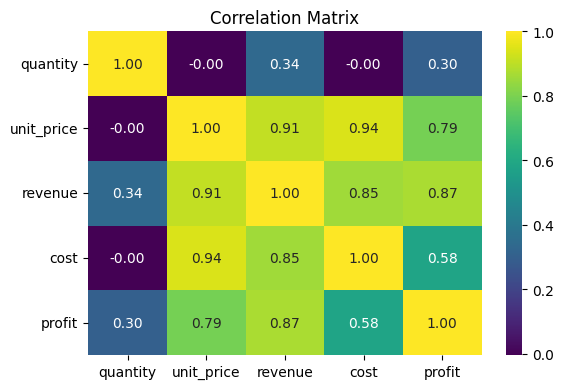

In [85]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting.

- **Cost** shows a strong link to revenue (0.85).

- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  
